In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, AveragePooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from utils import *
import numpy as np


In [2]:
# Data Path
with_mask_paths = ["./data/data2/with_mask/with_mask_" + str(i) + ".jpg" for i in range(1, 4500 + 1)]
without_mask_paths = ["./data/data2/without_mask/without_mask_" + str(i) + ".jpg" for i in range(1, 4500 + 1)]

In [3]:
# Declare array for storing data & corresponding label
data = []
label = []

# Load with_mask data
load_data_with_label(path_arr=with_mask_paths,
                     data_arr=data,
                     label_arr=label,
                     img_size=(224, 224, 3),
                     _label = 1)

In [4]:
# Load without_mask data
load_data_with_label(path_arr=without_mask_paths,
                     data_arr=data,
                     label_arr=label,
                     img_size=(224, 224, 3),
                     _label = 0)

print("Data Load Done!")

Data Load Done!


In [5]:
# Convert to numpy array
data = np.array(data, dtype="float32")
label = np.array(label)

# Label one-hot encoding
_lb = LabelBinarizer()

label = _lb.fit_transform(label)
label = to_categorical(label)



In [6]:
# Split data to train data and test data
(train_X, test_X, train_Y, test_Y) = train_test_split(data, label,
                                                      test_size=0.15,
                                                      stratify=label,
                                                      random_state=777,
                                                      shuffle=True)


In [7]:
# Make model

base_model = MobileNetV2(weights="imagenet",
                         include_top=False,
                         input_tensor=Input(shape=(224,224,3)))

main_model = base_model.output
main_model = AveragePooling2D(pool_size=(7,7))(main_model)
main_model = Flatten()(main_model)
main_model = Dense(128, activation='relu')(main_model)
main_model = Dropout(0.5)(main_model)
main_model = Dense(2, activation="softmax")(main_model)

model = Model(inputs = base_model.input, outputs = main_model)

c:\users\juhyeon park\anaconda3\envs\test_gpu\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [8]:
# Declare epoch, batch size, optimizer
epochs = 30
batch_size = 100
optimizer = Adam(learning_rate=1e-4, decay = 1e-4/epochs)



In [9]:
# Compile and training
model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics=['accuracy'])

history = model.fit(train_X, train_Y,
                    batch_size=batch_size,
                    validation_split=0.1,
                    epochs = epochs)

# Model save
model.save("./checkpoint")

Train on 6480 samples, validate on 720 samples
Epoch 1/10
6480/6480 [==============================] - 36s 6ms/sample - loss: 0.1403 - accuracy: 0.9380 - val_loss: 0.0320 - val_accuracy: 0.9875

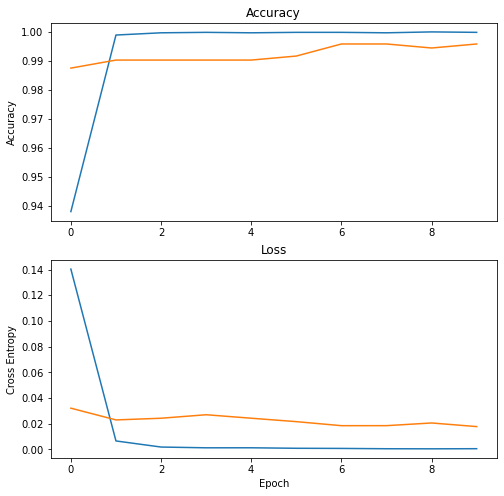

1800/1800 [==============================] - 2s 1ms/sample - loss: 0.0327 - accuracy: 0.9950

[0.032683400940937114, 0.995]

In [10]:
# Draw Plot and Save
training_log_plot(history)

# Evaluate
model.evaluate(test_X, test_Y)

In [11]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________